# Logistic Regression Classification

In [2]:
# Imports
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from skopt import BayesSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Read Datasets

In [3]:
df_day_minus_0 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_0.csv')
df_day_minus_1 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_1.csv')
df_day_minus_2 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_2.csv')
df_day_minus_7 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_7.csv')

C:\Users\ali_m\AppData\Local\Temp\ipykernel_45264\2795191405.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_day_minus_0 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_0.csv')


Handle missing values

In [4]:
df_day_minus_0 = df_day_minus_0.drop(columns=['date','file_date'], axis=1)
df_day_minus_1 = df_day_minus_1.drop(columns=['date'], axis=1)
df_day_minus_2 = df_day_minus_2.drop(columns=['date'], axis=1)
df_day_minus_7 = df_day_minus_7.drop(columns=['date'], axis=1)

df_day_minus_0['null_columns'] = df_day_minus_0.isnull().sum(axis=1)
df_day_minus_1['null_columns'] = df_day_minus_1.isnull().sum(axis=1)
df_day_minus_2['null_columns'] = df_day_minus_2.isnull().sum(axis=1)
df_day_minus_7['null_columns'] = df_day_minus_7.isnull().sum(axis=1)

df_day_minus_0 = df_day_minus_0[df_day_minus_0.null_columns == 0]
df_day_minus_1 = df_day_minus_1[df_day_minus_1.null_columns == 0]
df_day_minus_2 = df_day_minus_2[df_day_minus_2.null_columns == 0]
df_day_minus_7 = df_day_minus_7[df_day_minus_7.null_columns == 0]

Split into x and y

In [5]:
X_0 = df_day_minus_0.drop(columns=['failure', 'serial_number', 'null_columns'], axis=1)
X_1 = df_day_minus_1.drop(columns=['failure', 'serial_number', 'null_columns'], axis=1)
X_2 = df_day_minus_2.drop(columns=['failure', 'serial_number', 'null_columns'], axis=1)
X_7 = df_day_minus_7.drop(columns=['failure', 'serial_number', 'null_columns'], axis=1)

Y_0 = df_day_minus_0['failure']
Y_1 = df_day_minus_1['failure']
Y_2 = df_day_minus_2['failure']
Y_7 = df_day_minus_7['failure']

One-hot encode category columns

In [6]:
X_0 = pd.get_dummies(X_0, prefix=['model'], dtype=int)
X_1 = pd.get_dummies(X_1, prefix=['model'], dtype=int)
X_2 = pd.get_dummies(X_2, prefix=['model'], dtype=int)
X_7 = pd.get_dummies(X_7, prefix=['model'], dtype=int)

Split into training and test

In [7]:
encoder_0 = ce.OrdinalEncoder(cols=['capacity_bytes'])
encoder_1 = ce.OrdinalEncoder(cols=['capacity_bytes'])
encoder_2 = ce.OrdinalEncoder(cols=['capacity_bytes'])
encoder_7 = ce.OrdinalEncoder(cols=['capacity_bytes'])

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, Y_0, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, Y_7, test_size=0.2, random_state=42)

X_train_0 = encoder_0.fit_transform(X_train_0)
X_test_0 = encoder_0.transform(X_test_0)

X_train_1 = encoder_1.fit_transform(X_train_1)
X_test_1 = encoder_1.transform(X_test_1)

X_train_2 = encoder_2.fit_transform(X_train_2)
X_test_2 = encoder_2.transform(X_test_2)

X_train_7 = encoder_0.fit_transform(X_train_7)
X_test_7 = encoder_0.transform(X_test_7)

Scale data

In [8]:
from sklearn.preprocessing import RobustScaler

# Fit and transform training data
r_scaler_0 = RobustScaler()
scaled_X_train_0 = X_train_0.copy()
scaled_X_train_0[scaled_X_train_0.columns] = r_scaler_0.fit_transform(scaled_X_train_0[scaled_X_train_0.columns])

r_scaler_1 = RobustScaler()
scaled_X_train_1 = X_train_1.copy()
scaled_X_train_1[scaled_X_train_1.columns] = r_scaler_1.fit_transform(scaled_X_train_1[scaled_X_train_1.columns])

r_scaler_2 = RobustScaler()
scaled_X_train_2 = X_train_2.copy()
scaled_X_train_2[scaled_X_train_2.columns] = r_scaler_2.fit_transform(scaled_X_train_2[scaled_X_train_2.columns])

r_scaler_7 = RobustScaler()
scaled_X_train_7 = X_train_7.copy()
scaled_X_train_7[scaled_X_train_7.columns] = r_scaler_7.fit_transform(scaled_X_train_7[scaled_X_train_7.columns])

# Transform test data
scaled_X_test_0 = X_test_0.copy()
scaled_X_test_0[scaled_X_test_0.columns] = r_scaler_0.transform(scaled_X_test_0[scaled_X_test_0.columns])

scaled_X_test_1 = X_test_1.copy()
scaled_X_test_1[scaled_X_test_1.columns] = r_scaler_1.transform(scaled_X_test_1[scaled_X_test_1.columns])

scaled_X_test_2 = X_test_2.copy()
scaled_X_test_2[scaled_X_test_2.columns] = r_scaler_2.transform(scaled_X_test_2[scaled_X_test_2.columns])

scaled_X_test_7 = X_test_7.copy()
scaled_X_test_7[scaled_X_test_7.columns] = r_scaler_7.transform(scaled_X_test_7[scaled_X_test_7.columns])

Random correlation analysis here... not directly related to SVM classification

['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw', 'smart_187_raw', 'smart_188_raw', 'smart_190_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw', 'failure']
failure                 1.000000
smart_187_raw           0.611359
smart_5_raw             0.535177
smart_197_raw           0.505616
smart_198_raw           0.505616
smart_188_raw           0.137818
smart_4_raw             0.101506
smart_12_raw            0.095900
smart_199_raw           0.070498
smart_7_raw             0.058388
smart_242_raw           0.048175
smart_192_raw           0.045534
smart_193_raw           0.044820
smart_190_raw           0.042928
smart_194_normalized    0.042928
smart_194_raw           0.042928
smart_241_raw           0.036825
smart_9_raw             0.031434
smart_7_normalized      0.004949
smart_1_raw            -0.001497
sm

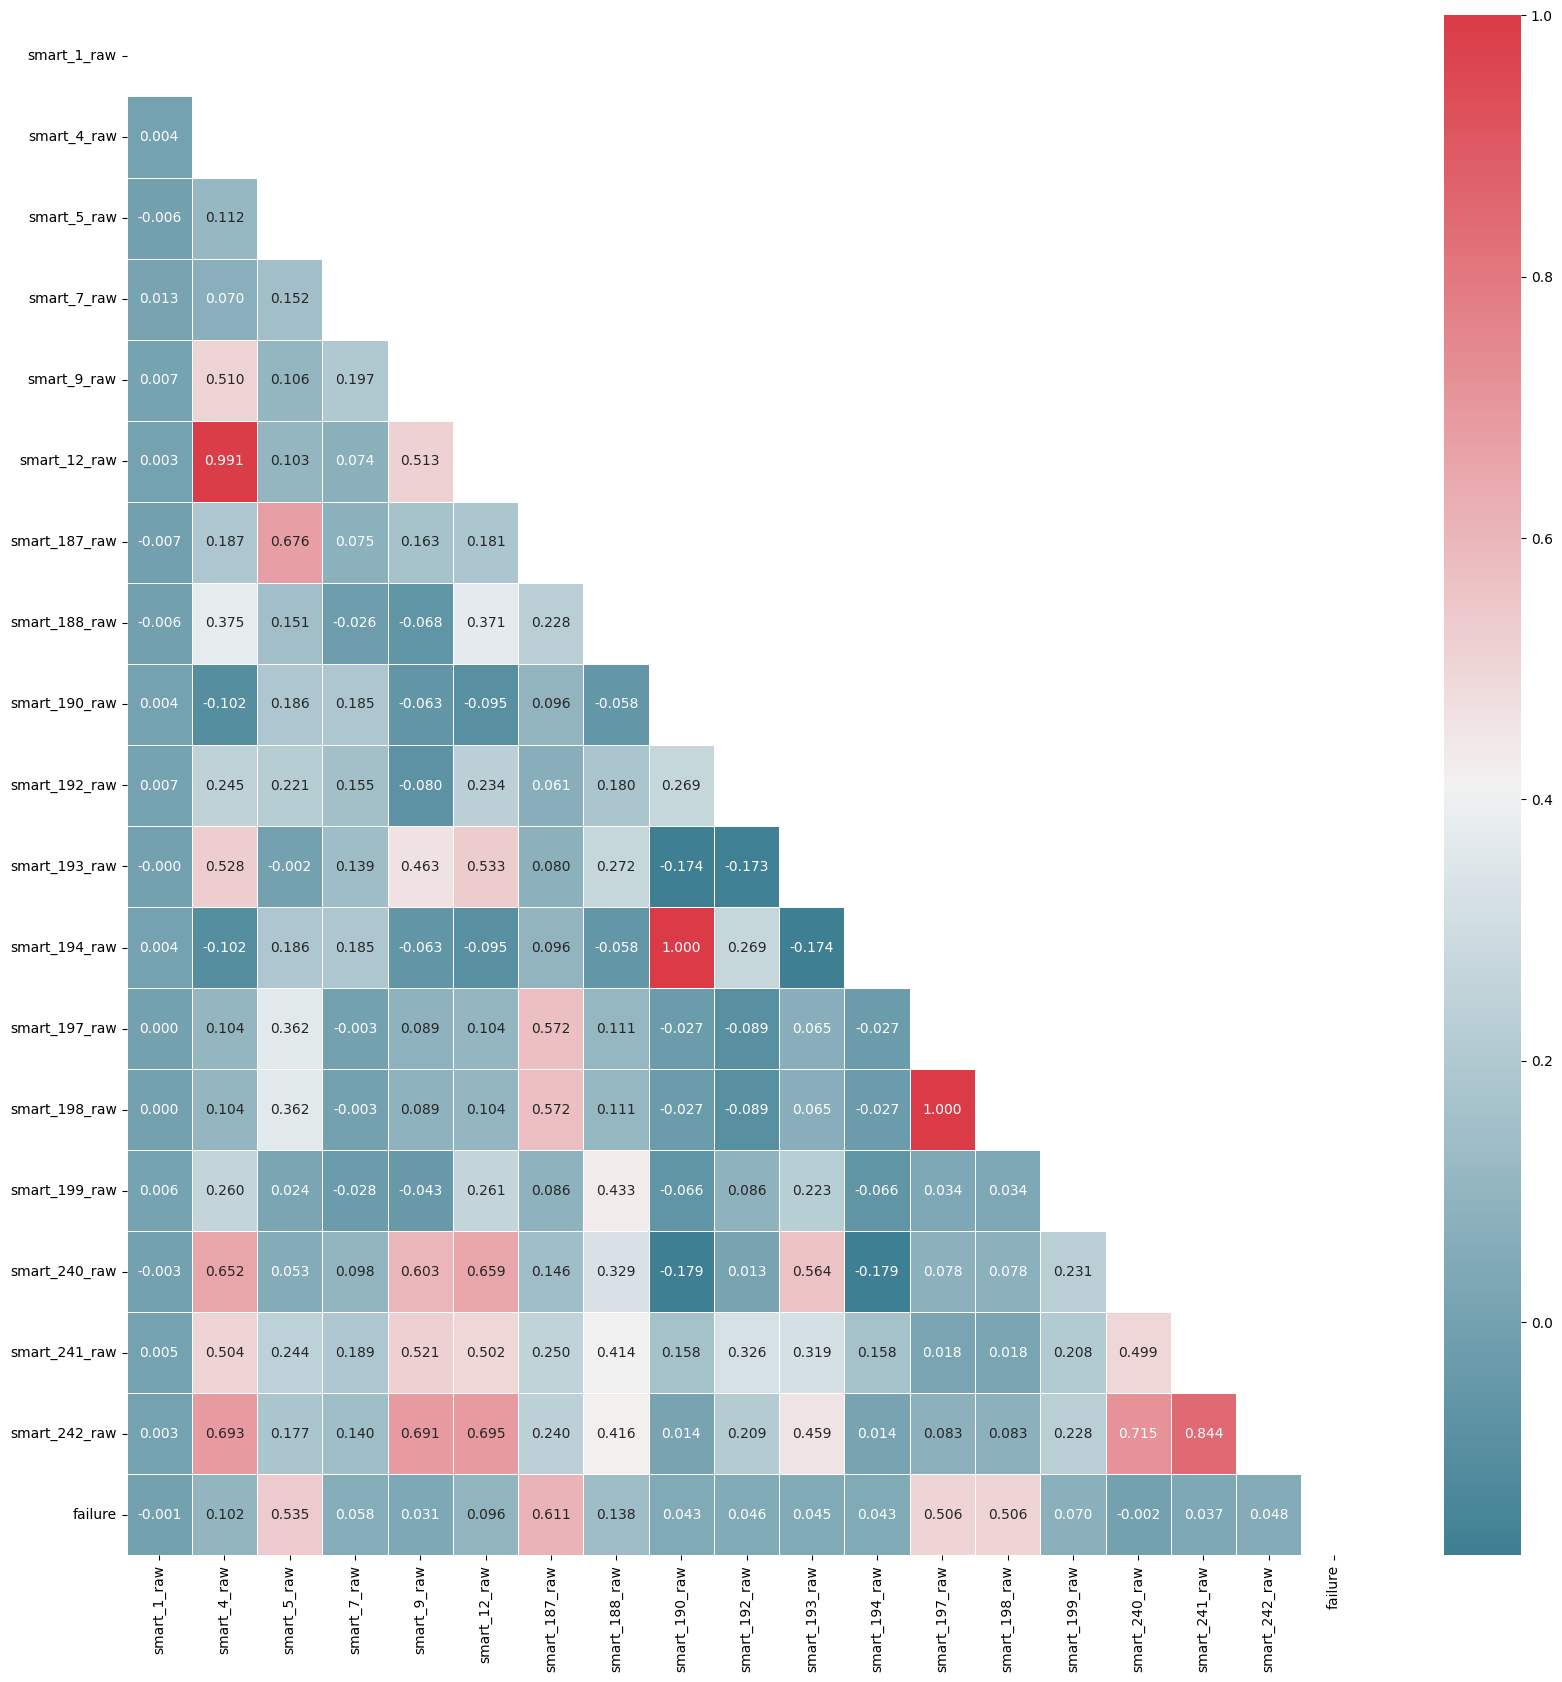

In [9]:
corr = df_day_minus_0.drop(columns=['model', 'serial_number', 'null_columns'], axis=1).corr(method='spearman')['failure'].sort_values(ascending=False)

raw_cols = [col for col in df_day_minus_0 if col.endswith('raw')]
raw_cols.extend(['failure'])
raw_df = df_day_minus_0[raw_cols].drop(columns=['smart_3_raw', 'smart_10_raw'], axis=1)
raw_df_corr = raw_df.corr(method='spearman')

print(raw_cols)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(raw_df.corr(method='spearman'), dtype=bool))

plt.figure(figsize=(20,20))
sns.heatmap(data=raw_df_corr, annot=True, linewidth=.5, fmt=".3f", cmap=sns.diverging_palette(220, 10, as_cmap=True), mask=mask)

raw_df_corr['target_col'] = raw_df_corr.index
print(corr)

In [10]:
# Association between continuous variable and a binary variable -> Point-biserial correlation coefficient (PBC)
from scipy.stats import pointbiserialr

raw_cols = [col for col in df_day_minus_0 if col.endswith('raw')]
raw_cols.extend(['failure'])
raw_df = df_day_minus_0[raw_cols].drop(columns=['smart_3_raw', 'smart_10_raw'], axis=1)
y = raw_df['failure'].astype(float)

corr_list = []

for column in raw_df:
    x=raw_df[column]
    corr = pointbiserialr(list(y), list(x))
    corr_list.append([corr[0], corr[1]])

df_corr_list = pd.DataFrame(corr_list, columns=['PBC', 'p-value'])
df_corr_list.index = raw_df.columns
df_corr_list.sort_values(ascending=False, by='PBC', inplace=True)

print(df_corr_list.head(20))

                    PBC       p-value
failure        1.000000  0.000000e+00
smart_5_raw    0.253112  0.000000e+00
smart_190_raw  0.058857  3.599445e-22
smart_194_raw  0.058857  3.599445e-22
smart_198_raw  0.057533  2.974866e-21
smart_197_raw  0.057533  2.974866e-21
smart_12_raw   0.048488  1.536412e-15
smart_187_raw  0.048357  1.830260e-15
smart_9_raw    0.029514  1.223351e-06
smart_199_raw  0.019207  1.593676e-03
smart_188_raw  0.018849  1.946848e-03
smart_4_raw    0.018112  2.910044e-03
smart_7_raw    0.016269  7.493540e-03
smart_241_raw  0.006147  3.123257e-01
smart_192_raw  0.006076  3.180044e-01
smart_242_raw  0.005393  3.753764e-01
smart_1_raw   -0.001458  8.105833e-01
smart_193_raw -0.008158  1.799563e-01
smart_240_raw -0.020345  8.251922e-04


Hyperparameter Tuning

In [11]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['sag', 'saga', 'liblinear'],
    'penalty': ['l1', 'l2']
}

lrc_model_0_cv = LogisticRegression(random_state=12)

rand_search_0 = RandomizedSearchCV(lrc_model_0_cv, param_grid, cv=5, scoring='roc_auc', n_iter=24, verbose=3)
rand_search_0.fit(scaled_X_train_0, y_train_0)

print(rand_search_0.best_params_)

df_randsearch_results_0 = pd.DataFrame(rand_search_0.cv_results_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.520 total time=   1.5s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.536 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.540 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.541 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.544 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.842 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.835 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.842 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.840 total time=   0.9s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.837 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.524 total time=   0.9s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.538 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.541 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.543 total time=   1.1s
[CV 5/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.549 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.520 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.536 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.540 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.541 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.544 total time=   1.4s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.521 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.535 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.544 total time=   0.0s
[CV 1/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.520 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.536 total time=   1.5s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.540 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.541 total time=   1.7s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.544 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.843 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.834 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.841 total time=   1.7s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.839 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.837 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .......C=1, penalty=l2, solver=sag;, score=0.524 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .......C=1, penalty=l2, solver=sag;, score=0.538 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .......C=1, penalty=l2, solver=sag;, score=0.541 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .......C=1, penalty=l2, solver=sag;, score=0.543 total time=   1.1s
[CV 5/5] END .......C=1, penalty=l2, solver=sag;, score=0.549 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.520 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.536 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.540 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.541 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.544 total time=   1.5s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.521 total time=   0.0s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.535 total time=   0.0s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.544 total time=   0.0s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.520 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.536 total time=   1.5s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.540 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.541 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.544 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.846 total time=  45.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.838 total time=  42.7s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.841 total time=  52.8s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.842 total time=  46.6s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.839 total time=  44.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.524 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.538 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.541 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.543 total time=   1.3s
[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.549 total time=   0.9s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.520 total time=   1.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.536 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.540 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.541 total time=   0.9s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.544 total time=   1.2s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.521 total time=   0.0s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.535 total time=   0.0s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.544 total time=   0.0s
[CV 1/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.520 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.536 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.540 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.541 total time=   1.4s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.544 total time=   1.8s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.845 total time=  44.5s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.837 total time=  45.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.841 total time=  52.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.843 total time=  46.8s


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.838 total time=  44.1s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.524 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.538 total time=   0.9s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.541 total time=   1.3s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.543 total time=   0.9s
[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.549 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.520 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.536 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.540 total time=   1.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.541 total time=   1.2s


c:\com748\code\com748\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.544 total time=   1.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.521 total time=   0.0s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.535 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.538 total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.538 total time=   0.1s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.544 total time=   0.0s


c:\com748\code\com748\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\com748\code\com748\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\com748\code\com748\venv\lib\site-packages\daal4py\sklearn\_n_jobs_support.py", line 110, in method_wrapper
    return method(self, *args, **kwargs)
  File "c:\com748\code\com748\venv\lib\site-packages\sklearnex\linear_model\logistic_regression.py", line 114, in fit
    dispatch(
  File "c:\com

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Train Models

Day minus 0

In [12]:
# {'solver': 'liblinear', 'penalty': 'l1', 'C': 10} => 0.8412

lrc_model_0 = LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=12)
lrc_model_0.fit(scaled_X_train_0, y_train_0)

test_predictions_0 = lrc_model_0.predict(scaled_X_test_0)
cm = confusion_matrix(y_true=y_test_0, y_pred=test_predictions_0)
print(cm)

# Evaluate the model on test set
test_accuracy_0 = lrc_model_0.score(scaled_X_test_0, y_test_0)
print("Test Accuracy:", test_accuracy_0)

[[2573  107]
 [1091 1632]]
Test Accuracy: 0.7782713307421802


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from sklearn.inspection import permutation_importance
r_0 = permutation_importance(lrc_model_0, scaled_X_test_0, y_test_0,
                           n_repeats=5,
                           random_state=67,
                           scoring='roc_auc')

for i in r_0.importances_mean.argsort()[::-1]:
    if r_0.importances_mean[i] - 2 * r_0.importances_std[i] > 0:
        print(f"{scaled_X_test_0.columns[i]:<8}\t\t"
              f"{r_0.importances_mean[i]:.3f}"
              f" +/- {r_0.importances_std[i]:.3f}")

smart_187_normalized		0.194 +/- 0.005
smart_5_raw		0.048 +/- 0.003
smart_1_normalized		0.031 +/- 0.002
model_ST12000NM0007		0.025 +/- 0.001
smart_9_raw		0.025 +/- 0.003
model_ST12000NM0008		0.024 +/- 0.002
model_ST8000NM0055		0.021 +/- 0.002
smart_3_normalized		0.017 +/- 0.002
model_ST8000DM002		0.013 +/- 0.001
model_ST4000DM000		0.013 +/- 0.001
model_ST14000NM001G		0.010 +/- 0.001
smart_198_raw		0.009 +/- 0.000
smart_5_normalized		0.008 +/- 0.002
smart_193_normalized		0.008 +/- 0.001
smart_9_normalized		0.008 +/- 0.002
smart_240_raw		0.005 +/- 0.001
smart_197_raw		0.005 +/- 0.000
smart_193_raw		0.005 +/- 0.001
smart_198_normalized		0.004 +/- 0.001
model_ST3000DM001		0.003 +/- 0.001
smart_194_raw		0.003 +/- 0.001
smart_188_raw		0.002 +/- 0.000
smart_197_normalized		0.002 +/- 0.001
capacity_bytes		0.001 +/- 0.000
smart_12_raw		0.001 +/- 0.000
smart_241_raw		0.001 +/- 0.000
smart_190_raw		0.000 +/- 0.000
smart_7_raw		0.000 +/- 0.000


                      mean_importance  std_importance               feature
smart_194_normalized    -5.185238e-05    1.428622e-04  smart_194_normalized
smart_190_normalized    -2.721428e-05    1.583483e-04  smart_190_normalized
smart_192_normalized    -2.526844e-05    1.359090e-04  smart_192_normalized
smart_4_normalized      -1.356603e-05    1.128753e-05    smart_4_normalized
smart_10_normalized      0.000000e+00    0.000000e+00   smart_10_normalized
smart_3_raw              0.000000e+00    0.000000e+00           smart_3_raw
smart_12_normalized      0.000000e+00    0.000000e+00   smart_12_normalized
smart_10_raw             0.000000e+00    0.000000e+00          smart_10_raw
smart_241_normalized     0.000000e+00    0.000000e+00  smart_241_normalized
smart_242_normalized     0.000000e+00    0.000000e+00  smart_242_normalized
smart_240_normalized     0.000000e+00    0.000000e+00  smart_240_normalized
smart_199_normalized     0.000000e+00    0.000000e+00  smart_199_normalized
smart_192_ra

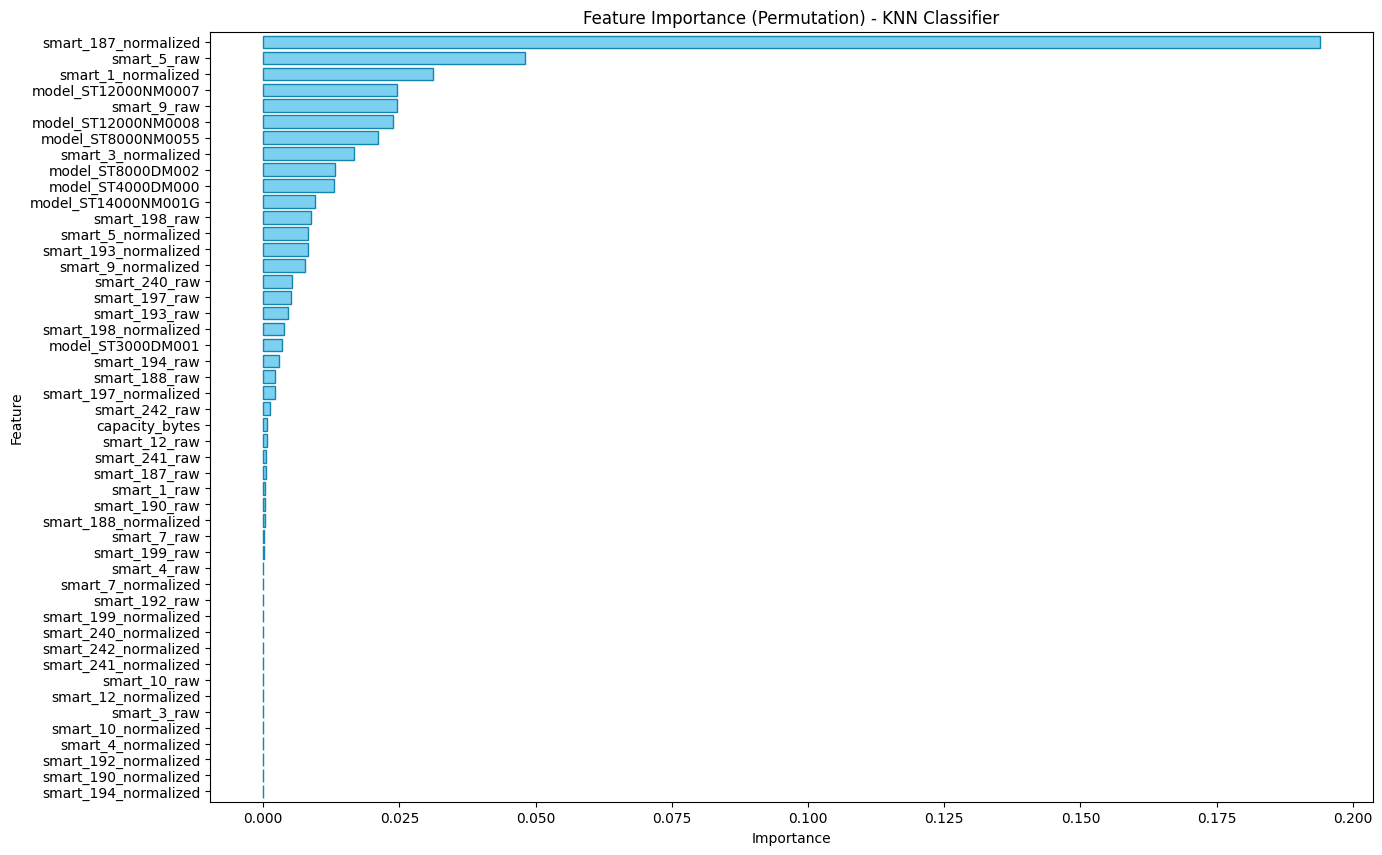

In [15]:
mean_0 = r_0.importances_mean
std_0 = r_0.importances_std
permutation_importances_0 = pd.DataFrame({'mean_importance': mean_0, 'std_importance': std_0}, index=scaled_X_test_0.columns)
permutation_importances_0['feature'] = permutation_importances_0.index
permutation_importances_0.sort_values(by=['mean_importance'], ascending=True, inplace=True)

plt.figure(figsize=(15,10))
fig = permutation_importances_0['mean_importance'].plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation) - LR Classifier")

print(permutation_importances_0)

0.842339715305222


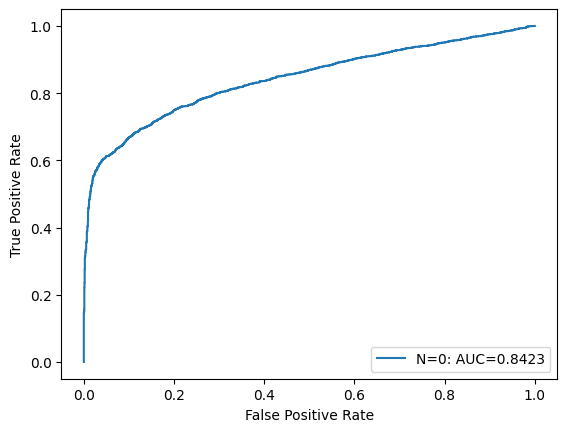

In [16]:
# Calculate AUROC
fpr_0, tpr_0, _ = roc_curve(y_test_0, lrc_model_0.predict_proba(scaled_X_test_0)[:,1])
auc_0 = round(roc_auc_score(y_test_0, lrc_model_0.predict_proba(scaled_X_test_0)[:,1]), 4)
plt.plot(fpr_0,tpr_0,label="N=0: AUC="+str(auc_0))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_0 = roc_auc_score(y_true=y_test_0, y_score=lrc_model_0.predict_proba(scaled_X_test_0)[:,1])
print(auroc_score_0)

Day minus 1

In [22]:
lrc_model_1 = LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=12)
lrc_model_1.fit(scaled_X_train_1, y_train_1)

test_predictions_1 = lrc_model_1.predict(scaled_X_test_1)
cm = confusion_matrix(y_true=y_test_1, y_pred=test_predictions_1)
print(cm)

# Evaluate the model on test set
test_accuracy_1 = lrc_model_1.score(scaled_X_test_1, y_test_1)
print("Test Accuracy:", test_accuracy_1)

[[2471  146]
 [1160 1513]]
Test Accuracy: 0.7531190926275992


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
from sklearn.inspection import permutation_importance
r_1 = permutation_importance(lrc_model_1, scaled_X_test_1, y_test_1,
                           n_repeats=5,
                           random_state=0,
                           scoring='roc_auc')

for i in r_1.importances_mean.argsort()[::-1]:
    if r_1.importances_mean[i] - 2 * r_1.importances_std[i] > 0:
        print(f"{scaled_X_test_1.columns[i]:<8}\t\t"
              f"{r_1.importances_mean[i]:.3f}"
              f" +/- {r_1.importances_std[i]:.3f}")

smart_187_normalized		0.181 +/- 0.002
smart_5_raw		0.040 +/- 0.004
smart_192_raw		0.031 +/- 0.002
smart_3_normalized		0.023 +/- 0.003
smart_198_raw		0.022 +/- 0.003
smart_1_normalized		0.021 +/- 0.002
model_ST12000NM0008		0.020 +/- 0.001
model_ST8000NM0055		0.015 +/- 0.000
smart_198_normalized		0.010 +/- 0.002
smart_9_normalized		0.010 +/- 0.001
smart_5_normalized		0.010 +/- 0.002
smart_197_raw		0.010 +/- 0.002
model_ST8000DM002		0.009 +/- 0.002
model_ST14000NM001G		0.009 +/- 0.000
smart_9_raw		0.008 +/- 0.001
smart_240_raw		0.005 +/- 0.001
smart_12_raw		0.004 +/- 0.001
smart_194_raw		0.002 +/- 0.001
smart_193_normalized		0.002 +/- 0.000
smart_7_normalized		0.002 +/- 0.001
model_ST12000NM0007		0.001 +/- 0.000
model_ST3000DM001		0.001 +/- 0.000
smart_190_normalized		0.001 +/- 0.000
smart_4_raw		0.000 +/- 0.000
smart_199_raw		0.000 +/- 0.000


                      mean_importance  std_importance               feature
smart_193_raw               -0.001935        0.000743         smart_193_raw
smart_242_raw               -0.000419        0.000393         smart_242_raw
capacity_bytes              -0.000271        0.000055        capacity_bytes
smart_1_raw                 -0.000092        0.000551           smart_1_raw
smart_12_normalized          0.000000        0.000000   smart_12_normalized
smart_10_normalized          0.000000        0.000000   smart_10_normalized
smart_10_raw                 0.000000        0.000000          smart_10_raw
smart_4_normalized           0.000000        0.000000    smart_4_normalized
smart_188_raw                0.000000        0.000000         smart_188_raw
smart_242_normalized         0.000000        0.000000  smart_242_normalized
smart_199_normalized         0.000000        0.000000  smart_199_normalized
smart_241_normalized         0.000000        0.000000  smart_241_normalized
smart_240_no

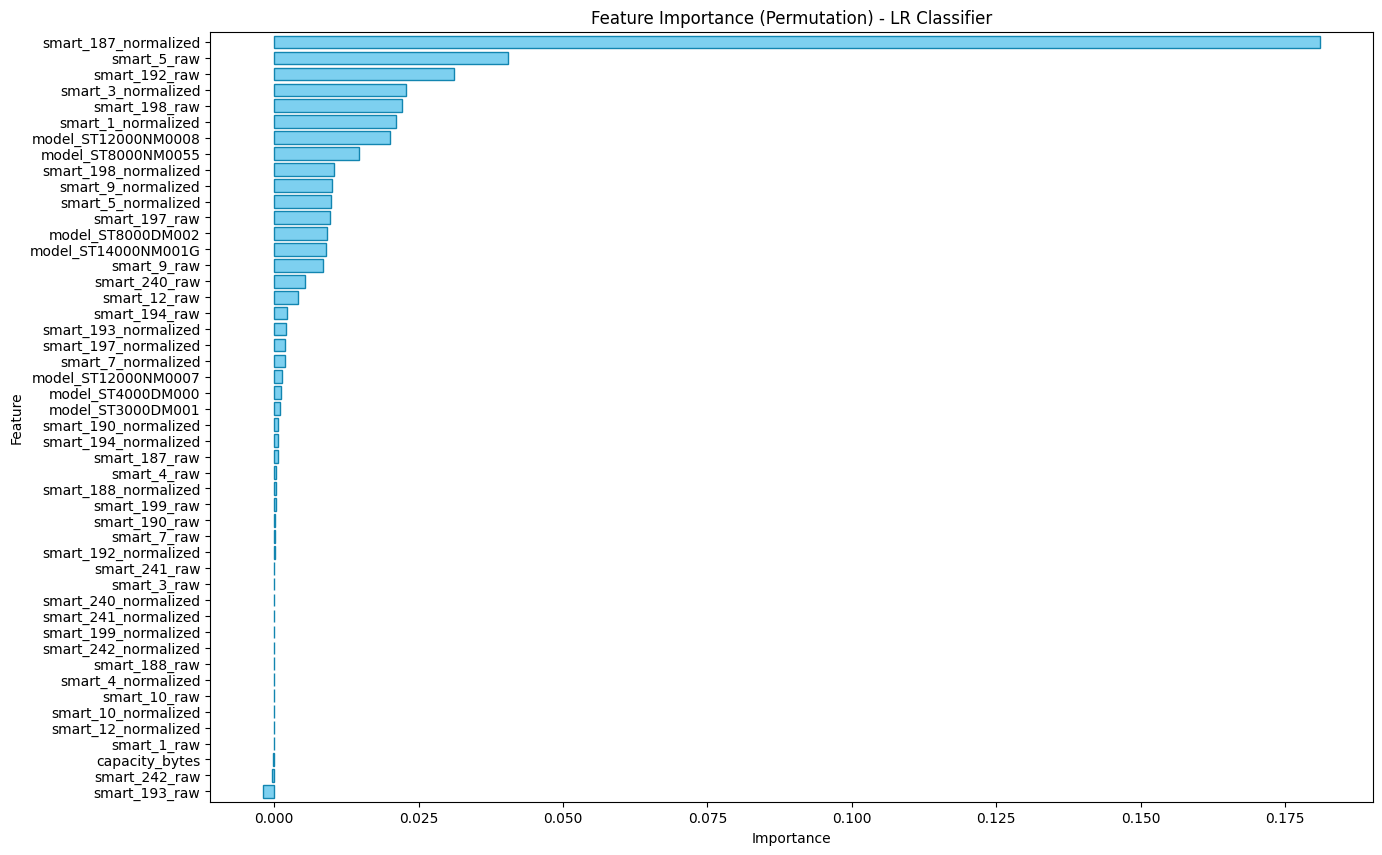

In [24]:
mean_1 = r_1.importances_mean
std_1 = r_1.importances_std
permutation_importances_1 = pd.DataFrame({'mean_importance': mean_1, 'std_importance': std_1}, index=scaled_X_test_1.columns)
permutation_importances_1['feature'] = permutation_importances_1.index
permutation_importances_1.sort_values(by=['mean_importance'], ascending=True, inplace=True)

plt.figure(figsize=(15,10))
fig = permutation_importances_1['mean_importance'].plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation) - LR Classifier")

print(permutation_importances_1)

0.8204406395719605


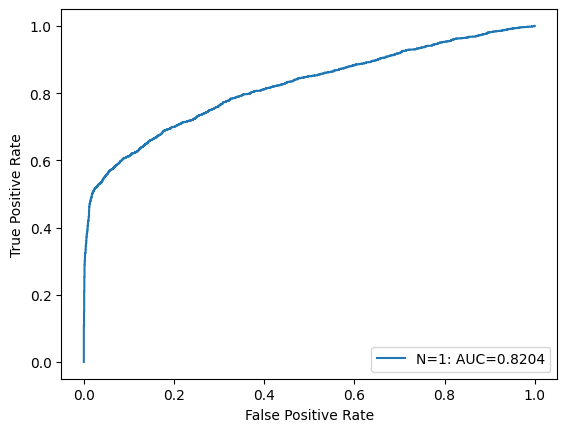

In [25]:
# Calculate AUROC
fpr_1, tpr_1, _ = roc_curve(y_test_1, lrc_model_1.predict_proba(scaled_X_test_1)[:,1])
auc_1 = round(roc_auc_score(y_test_1, lrc_model_1.predict_proba(scaled_X_test_1)[:,1]), 4)
plt.plot(fpr_1,tpr_1,label="N=1: AUC="+str(auc_1))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_1 = roc_auc_score(y_true=y_test_1, y_score=lrc_model_1.predict_proba(scaled_X_test_1)[:,1])
print(auroc_score_1)

Day minus 2

In [26]:
lrc_model_2 = LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=12)
lrc_model_2.fit(scaled_X_train_2, y_train_2)

test_predictions_2 = lrc_model_2.predict(scaled_X_test_2)
cm = confusion_matrix(y_true=y_test_2, y_pred=test_predictions_2)
print(cm)

# Evaluate the model on test set
test_accuracy_2 = lrc_model_2.score(scaled_X_test_2, y_test_2)
print("Test Accuracy:", test_accuracy_2)

[[2420  194]
 [1117 1557]]
Test Accuracy: 0.7520801815431165


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
from sklearn.inspection import permutation_importance
r_2 = permutation_importance(lrc_model_2, scaled_X_test_2, y_test_2,
                           n_repeats=5,
                           random_state=0,
                           scoring='roc_auc')

for i in r_2.importances_mean.argsort()[::-1]:
    if r_2.importances_mean[i] - 2 * r_2.importances_std[i] > 0:
        print(f"{scaled_X_test_2.columns[i]:<8}\t\t"
              f"{r_2.importances_mean[i]:.3f}"
              f" +/- {r_2.importances_std[i]:.3f}")

smart_187_normalized		0.173 +/- 0.008
smart_5_raw		0.051 +/- 0.005
model_ST8000NM0055		0.026 +/- 0.002
smart_192_raw		0.026 +/- 0.002
smart_3_normalized		0.022 +/- 0.001
smart_9_raw		0.018 +/- 0.002
capacity_bytes		0.018 +/- 0.001
smart_197_raw		0.017 +/- 0.002
model_ST8000DM002		0.017 +/- 0.003
smart_9_normalized		0.015 +/- 0.002
smart_198_raw		0.012 +/- 0.001
smart_1_normalized		0.012 +/- 0.002
smart_240_raw		0.007 +/- 0.001
model_ST12000NM0008		0.006 +/- 0.001
smart_12_raw		0.005 +/- 0.001
smart_193_normalized		0.005 +/- 0.001
model_ST12000NM0007		0.005 +/- 0.001
smart_5_normalized		0.005 +/- 0.001
smart_197_normalized		0.004 +/- 0.001
smart_198_normalized		0.004 +/- 0.001
smart_193_raw		0.003 +/- 0.001
smart_194_normalized		0.002 +/- 0.000
smart_190_normalized		0.001 +/- 0.000
smart_188_normalized		0.001 +/- 0.000
smart_199_raw		0.000 +/- 0.000
smart_4_raw		0.000 +/- 0.000


                      mean_importance  std_importance               feature
smart_242_raw               -0.000284        0.000222         smart_242_raw
model_ST3000DM001           -0.000141        0.000054     model_ST3000DM001
smart_3_raw                  0.000000        0.000000           smart_3_raw
smart_10_normalized          0.000000        0.000000   smart_10_normalized
smart_188_raw                0.000000        0.000000         smart_188_raw
smart_199_normalized         0.000000        0.000000  smart_199_normalized
smart_12_normalized          0.000000        0.000000   smart_12_normalized
smart_10_raw                 0.000000        0.000000          smart_10_raw
smart_240_normalized         0.000000        0.000000  smart_240_normalized
smart_242_normalized         0.000000        0.000000  smart_242_normalized
smart_241_normalized         0.000000        0.000000  smart_241_normalized
smart_4_normalized           0.000018        0.000040    smart_4_normalized
smart_1_raw 

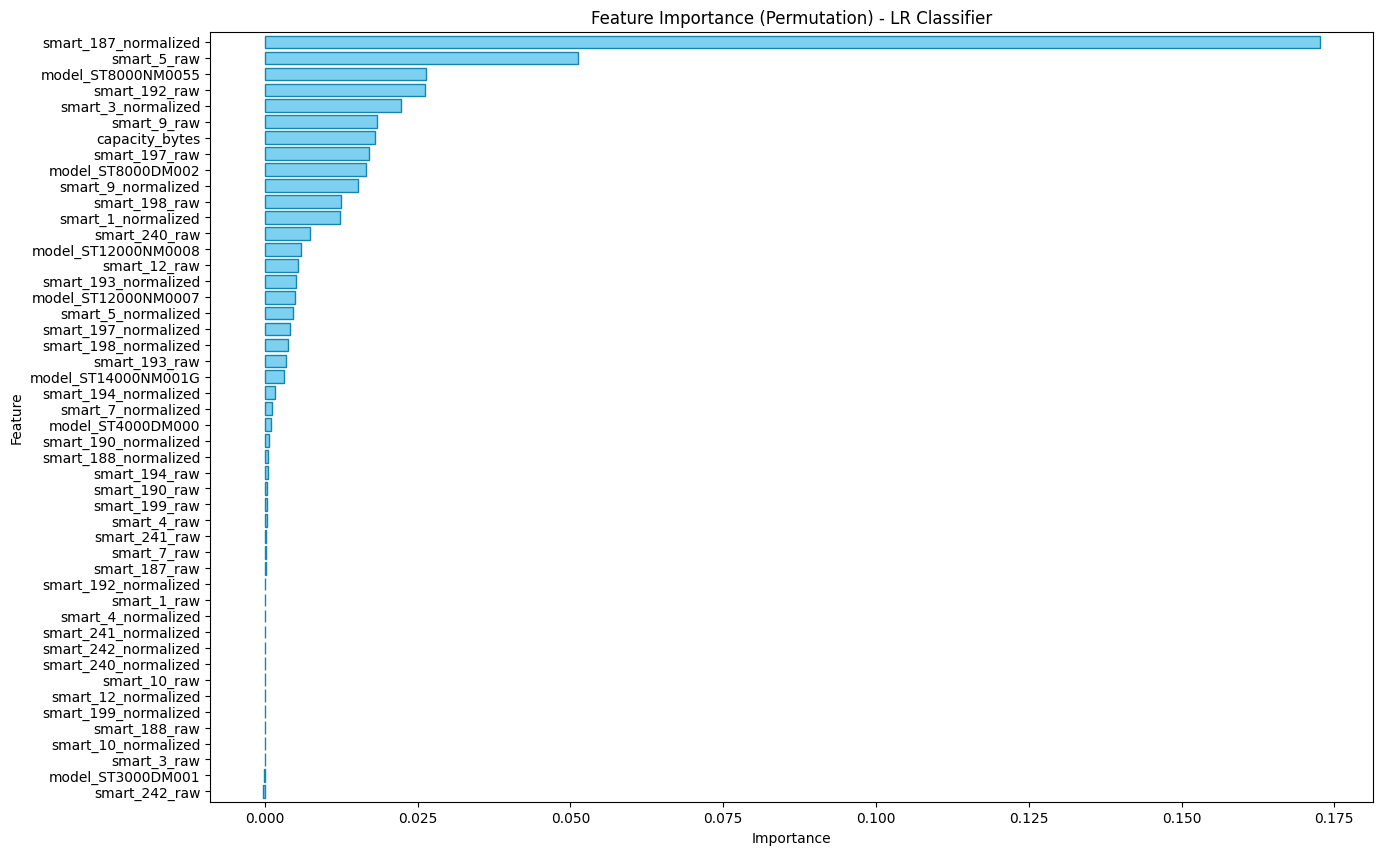

In [28]:
mean_2 = r_2.importances_mean
std_2 = r_2.importances_std
permutation_importances_2 = pd.DataFrame({'mean_importance': mean_2, 'std_importance': std_2}, index=scaled_X_test_2.columns)
permutation_importances_2['feature'] = permutation_importances_2.index
permutation_importances_2.sort_values(by=['mean_importance'], ascending=True, inplace=True)

plt.figure(figsize=(15,10))
fig = permutation_importances_2['mean_importance'].plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation) - LR Classifier")

print(permutation_importances_2)

0.8176807009492069


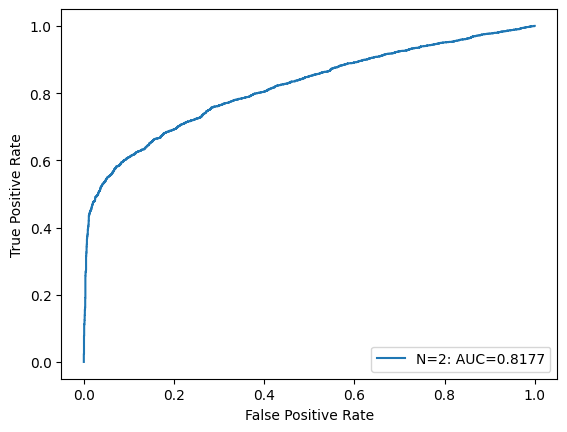

In [29]:
# Calculate AUROC
fpr_2, tpr_2, _ = roc_curve(y_test_2, lrc_model_2.predict_proba(scaled_X_test_2)[:,1])
auc_2 = round(roc_auc_score(y_test_2, lrc_model_2.predict_proba(scaled_X_test_2)[:,1]), 4)
plt.plot(fpr_2,tpr_2,label="N=2: AUC="+str(auc_2))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_2 = roc_auc_score(y_true=y_test_2, y_score=lrc_model_2.predict_proba(scaled_X_test_2)[:,1])
print(auroc_score_2)

Day minus 7

In [30]:
lrc_model_7 = LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=12)
lrc_model_7.fit(scaled_X_train_7, y_train_7)

test_predictions_7 = lrc_model_7.predict(scaled_X_test_7)
cm = confusion_matrix(y_true=y_test_7, y_pred=test_predictions_7)
print(cm)

# Evaluate the model on test set
test_accuracy_7 = lrc_model_7.score(scaled_X_test_7, y_test_7)
print("Test Accuracy:", test_accuracy_7)

[[2478  173]
 [1314 1350]]
Test Accuracy: 0.7202257761053622


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
from sklearn.inspection import permutation_importance
r_7 = permutation_importance(lrc_model_7, scaled_X_test_7, y_test_7,
                           n_repeats=5,
                           random_state=0,
                           scoring='roc_auc')

for i in r_7.importances_mean.argsort()[::-1]:
    if r_7.importances_mean[i] - 2 * r_7.importances_std[i] > 0:
        print(f"{scaled_X_test_7.columns[i]:<8}\t\t"
              f"{r_7.importances_mean[i]:.3f}"
              f" +/- {r_7.importances_std[i]:.3f}")

smart_187_normalized		0.162 +/- 0.005
smart_5_raw		0.037 +/- 0.002
smart_9_normalized		0.026 +/- 0.003
smart_3_normalized		0.021 +/- 0.002
smart_198_raw		0.016 +/- 0.001
smart_9_raw		0.010 +/- 0.002
smart_193_normalized		0.009 +/- 0.001
smart_197_raw		0.008 +/- 0.001
model_ST8000NM0055		0.008 +/- 0.001
model_ST3000DM001		0.008 +/- 0.003
smart_240_raw		0.007 +/- 0.002
smart_5_normalized		0.006 +/- 0.002
model_ST12000NM0008		0.006 +/- 0.001
smart_193_raw		0.004 +/- 0.001
model_ST8000DM002		0.004 +/- 0.000
smart_198_normalized		0.004 +/- 0.001
model_ST12000NM0007		0.004 +/- 0.001
model_ST14000NM001G		0.003 +/- 0.001
smart_190_normalized		0.003 +/- 0.001
smart_12_raw		0.002 +/- 0.000
smart_194_normalized		0.001 +/- 0.000
smart_187_raw		0.001 +/- 0.000
capacity_bytes		0.001 +/- 0.000
smart_197_normalized		0.000 +/- 0.000
smart_1_raw		0.000 +/- 0.000


                      mean_importance  std_importance               feature
smart_4_normalized          -0.000221        0.000203    smart_4_normalized
smart_242_raw               -0.000076        0.001084         smart_242_raw
smart_190_raw               -0.000050        0.000091         smart_190_raw
smart_199_raw               -0.000046        0.000590         smart_199_raw
smart_192_raw               -0.000002        0.000001         smart_192_raw
smart_188_raw                0.000000        0.000000         smart_188_raw
smart_10_normalized          0.000000        0.000000   smart_10_normalized
smart_3_raw                  0.000000        0.000000           smart_3_raw
smart_188_normalized         0.000000        0.000000  smart_188_normalized
smart_240_normalized         0.000000        0.000000  smart_240_normalized
smart_241_normalized         0.000000        0.000000  smart_241_normalized
smart_242_normalized         0.000000        0.000000  smart_242_normalized
smart_199_no

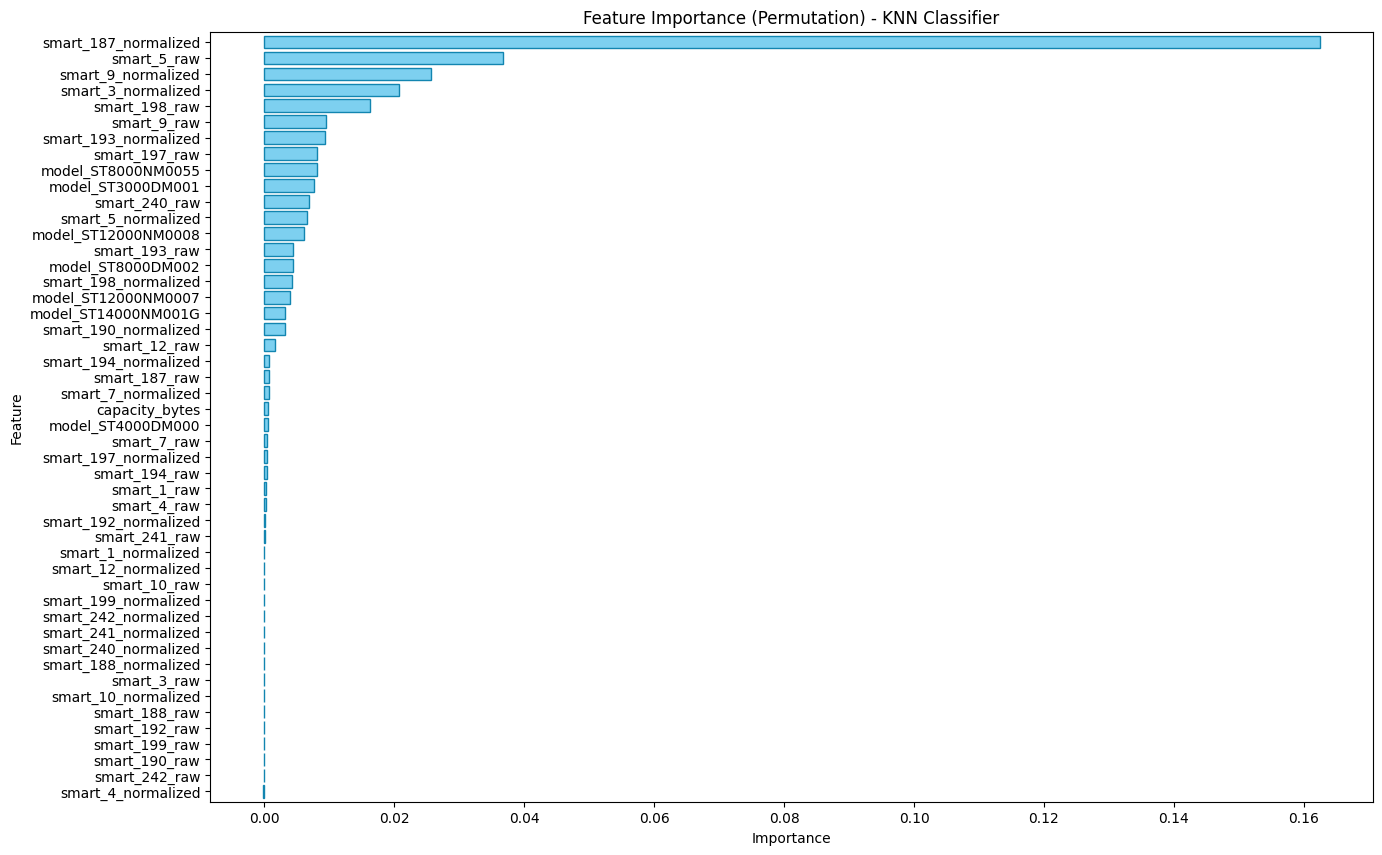

In [32]:
mean_7 = r_7.importances_mean
std_7 = r_7.importances_std
permutation_importances_7 = pd.DataFrame({'mean_importance': mean_7, 'std_importance': std_7}, index=scaled_X_test_7.columns)
permutation_importances_7['feature'] = permutation_importances_7.index
permutation_importances_7.sort_values(by=['mean_importance'], ascending=True, inplace=True)

plt.figure(figsize=(15,10))
fig = permutation_importances_7['mean_importance'].plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation) - LR Classifier")

print(permutation_importances_7)

0.7800624558923314


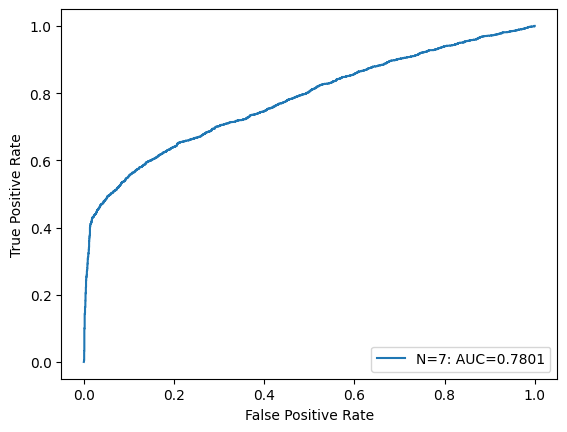

In [33]:
# Calculate AUROC
fpr_7, tpr_7, _ = roc_curve(y_test_7, lrc_model_7.predict_proba(scaled_X_test_7)[:,1])
auc_7 = round(roc_auc_score(y_test_7, lrc_model_7.predict_proba(scaled_X_test_7)[:,1]), 4)
plt.plot(fpr_7,tpr_7,label="N=7: AUC="+str(auc_7))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_7 = roc_auc_score(y_true=y_test_7, y_score=lrc_model_7.predict_proba(scaled_X_test_7)[:,1])
print(auroc_score_7)

Plot ROC curves for each lookahead window

In [34]:
print(auroc_score_0)
print(auroc_score_1)
print(auroc_score_2)
print(auroc_score_7)

0.842339715305222
0.8204406395719605
0.8176807009492069
0.7800624558923314


In [35]:
from sklearn.model_selection import cross_val_score

cfs_0 = cross_val_score(lrc_model_0, scaled_X_test_0, y_test_0, cv=5, scoring='roc_auc')
cfs_1 = cross_val_score(lrc_model_1, scaled_X_test_1, y_test_1, cv=5, scoring='roc_auc')
cfs_2 = cross_val_score(lrc_model_2, scaled_X_test_2, y_test_2, cv=5, scoring='roc_auc')
cfs_7 = cross_val_score(lrc_model_7, scaled_X_test_7, y_test_7, cv=5, scoring='roc_auc')

print(f'N=0: AUROC:{cfs_0.mean()}, STD:{cfs_0.std()}, MAX:{cfs_0.max()}, MIN:{cfs_0.min()}')
print(f'N=1: AUROC:{cfs_1.mean()}, STD:{cfs_1.std()}, MAX:{cfs_1.max()}, MIN:{cfs_1.min()}')
print(f'N=2: AUROC:{cfs_2.mean()}, STD:{cfs_2.std()}, MAX:{cfs_2.max()}, MIN:{cfs_2.min()}')
print(f'N=7: AUROC:{cfs_7.mean()}, STD:{cfs_7.std()}, MAX:{cfs_7.max()}, MIN:{cfs_7.min()}')

c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase

N=0: AUROC:0.8484139475316349, STD:0.011652099189629688, MAX:0.8693309646619842, MIN:0.8347954620280948
N=1: AUROC:0.8165520954193459, STD:0.013543901760891213, MAX:0.8359922234611316, MIN:0.7956112292489412
N=2: AUROC:0.8192366913702773, STD:0.011659882336742167, MAX:0.8382998531886705, MIN:0.8071161048689137
N=7: AUROC:0.7870596695503785, STD:0.009945463874602777, MAX:0.8050798258345429, MIN:0.7764345640553647


c:\com748\code\com748\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'True Positive Rate')

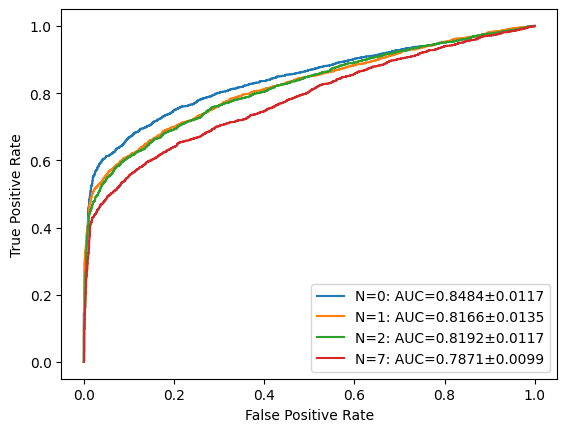

In [36]:
label_0 = f"N=0: AUC={round(cfs_0.mean(), 4)}\u00B1{round(cfs_0.std(), 4)}"
label_1 = f"N=1: AUC={round(cfs_1.mean(), 4)}\u00B1{round(cfs_1.std(), 4)}"
label_2 = f"N=2: AUC={round(cfs_2.mean(), 4):.4f}\u00B1{round(cfs_2.std(), 4)}"
label_7 = f"N=7: AUC={round(cfs_7.mean(), 4)}\u00B1{round(cfs_7.std(), 4)}"

plt.plot(fpr_0,tpr_0,label=label_0)
plt.plot(fpr_1,tpr_1,label=label_1)
plt.plot(fpr_2,tpr_2,label=label_2)
plt.plot(fpr_7,tpr_7,label=label_7)
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [39]:
permutation_importances_0 = permutation_importances_0.rename(columns={'mean_importance':'day_minus_0', 'std_importance':'std_importance_0'})
permutation_importances_1 = permutation_importances_1.rename(columns={'mean_importance':'day_minus_1', 'std_importance':'std_importance_1'})
permutation_importances_2 = permutation_importances_2.rename(columns={'mean_importance':'day_minus_2', 'std_importance':'std_importance_2'})
permutation_importances_7 = permutation_importances_7.rename(columns={'mean_importance':'day_minus_7', 'std_importance':'std_importance_7'})

features = permutation_importances_0.merge(permutation_importances_1, on='feature').merge(permutation_importances_2, on='feature').merge(permutation_importances_7, on='feature')

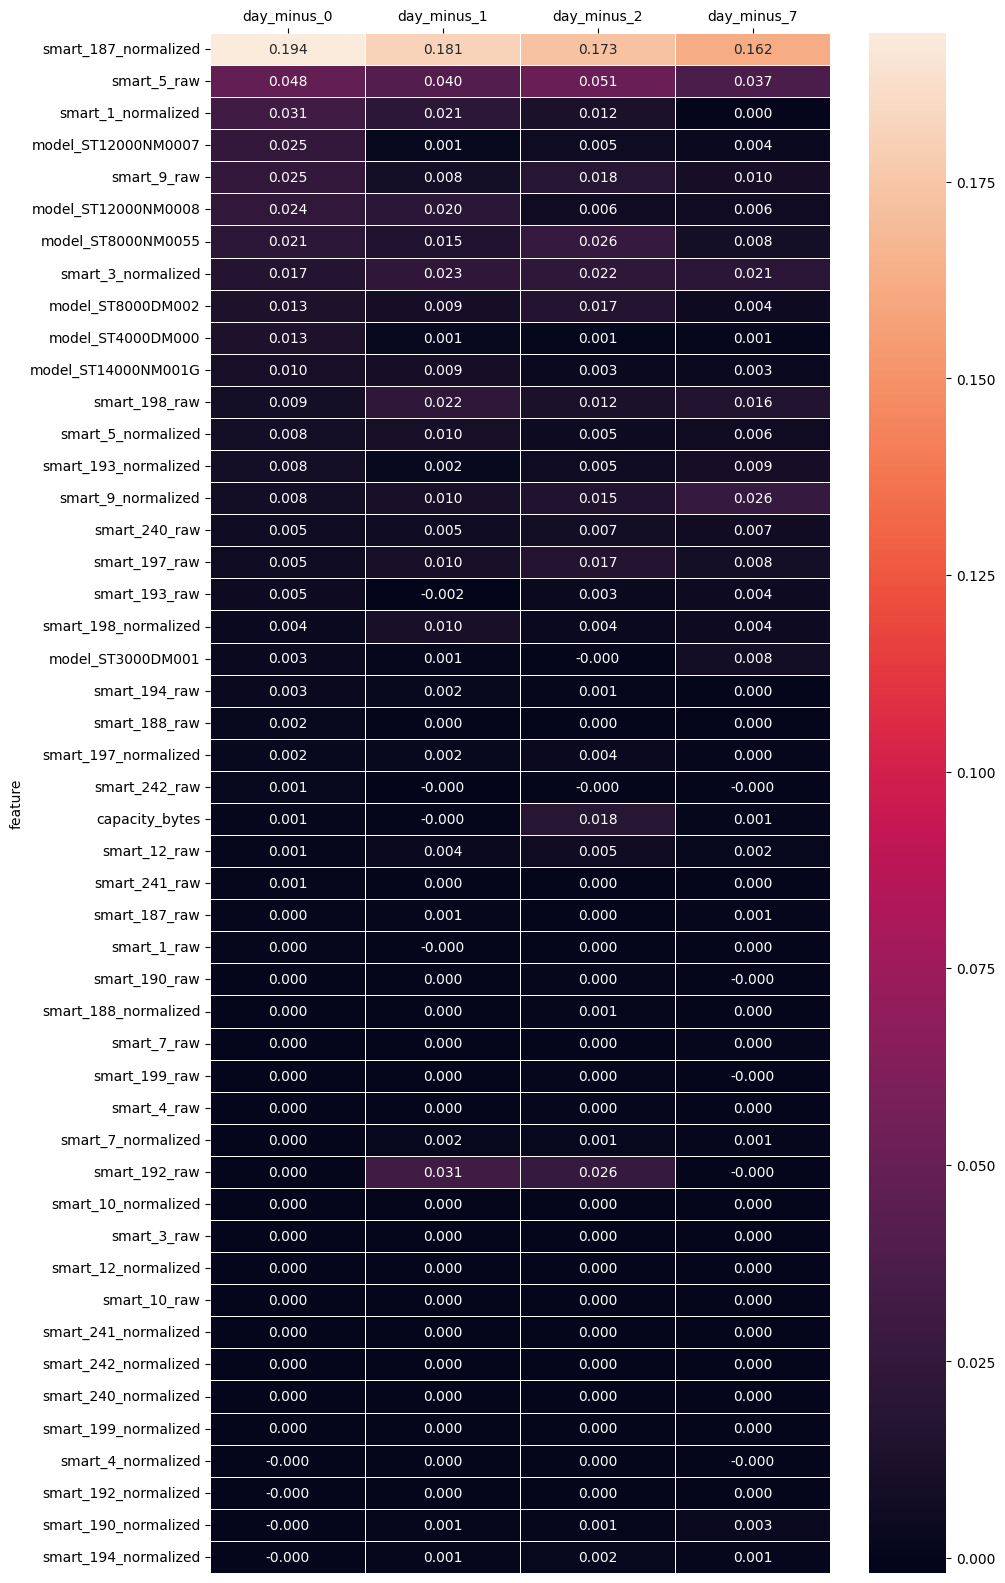

In [40]:
plt.figure(figsize=(10,20))
features.set_index('feature', inplace=True)
features.sort_values('day_minus_0', ascending=False, inplace=True)
heatmap_1 = sns.heatmap(data=features[['day_minus_0', 'day_minus_1', 'day_minus_2', 'day_minus_7']], annot=True, linewidth=.5, fmt=".3f")
heatmap_1.xaxis.tick_top()

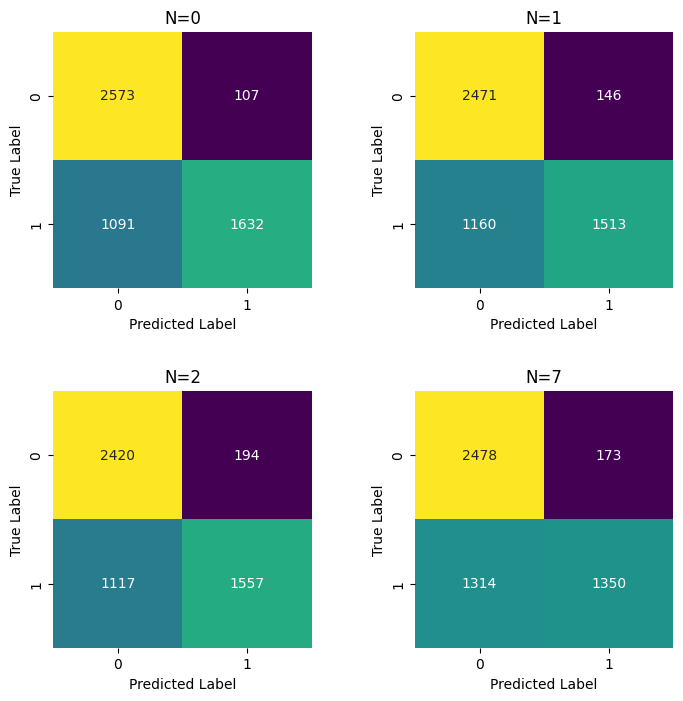

In [43]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

cm_0 = confusion_matrix(y_true=y_test_0, y_pred=test_predictions_0)
cm_1 = confusion_matrix(y_true=y_test_1, y_pred=test_predictions_1)
cm_2 = confusion_matrix(y_true=y_test_2, y_pred=test_predictions_2)
cm_7 = confusion_matrix(y_true=y_test_7, y_pred=test_predictions_7)

ax = fig.add_subplot(2, 2, 1)
sns.heatmap(cm_0, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=0')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax = fig.add_subplot(2, 2, 2)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=1')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax = fig.add_subplot(2, 2, 3)
sns.heatmap(cm_2, annot=True, fmt='d',  cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=2')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax = fig.add_subplot(2, 2, 4)
sns.heatmap(cm_7, annot=True, fmt='d',  cmap='viridis', cbar=False, ax=ax)
ax.title.set_text('N=7')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_0, test_predictions_0))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      2680
           1       0.94      0.60      0.73      2723

    accuracy                           0.78      5403
   macro avg       0.82      0.78      0.77      5403
weighted avg       0.82      0.78      0.77      5403

